In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

In [84]:
df = pd.read_csv("nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [85]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [86]:
df.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


In [87]:
top = df['artist_top_genre'].value_counts()
print(df.head())


                       name                         album  \
0                    Sparky            Mandy & The Jungle   
1                shuga rush  EVERYTHING YOU HEARD IS TRUE   
2                     LITT!                         LITT!   
3  Confident / Feeling Cool               Enjoy Your Life   
4                wanted you                         rare.   

                artist artist_top_genre  release_date  length  popularity  \
0        Cruel Santino  alternative r&b          2019  144000          48   
1  Odunsi (The Engine)          afropop          2020   89488          30   
2                 AYLØ        indie r&b          2018  207758          40   
3           Lady Donli     nigerian pop          2019  175135          14   
4  Odunsi (The Engine)          afropop          2018  152049          25   

   danceability  acousticness  energy  instrumentalness  liveness  loudness  \
0         0.666        0.8510   0.420          0.534000    0.1100    -6.699   
1         0.

Text(0.5, 1.0, 'Top 5 Genres')

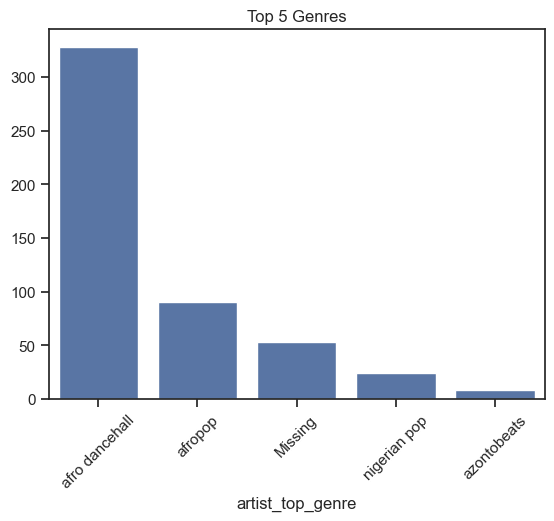

In [88]:
plt.figure()
sns.barplot(x=top[:5].index,y=top[:5].values) #taking top 5
plt.xticks(rotation=45) #making it easier to read
plt.title('Top 5 Genres')

In [89]:
df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
df.head()


,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


<Axes: xlabel='artist_top_genre'>

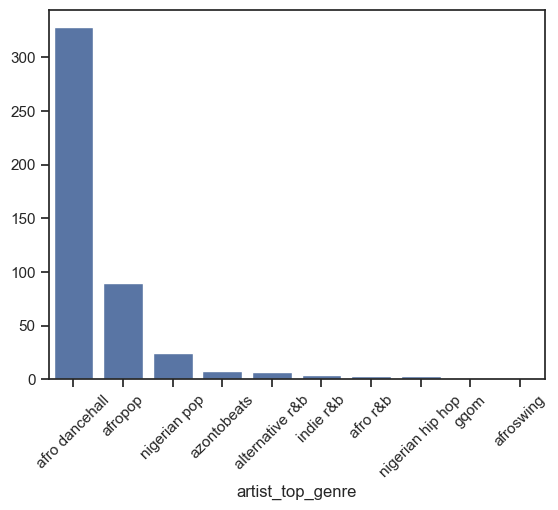

In [90]:
plt.xticks(rotation=45) #making it easier to read
sns.barplot(x=top[:10].index,y=top[:10].values)

Text(0.5, 1.0, 'Top Genres')

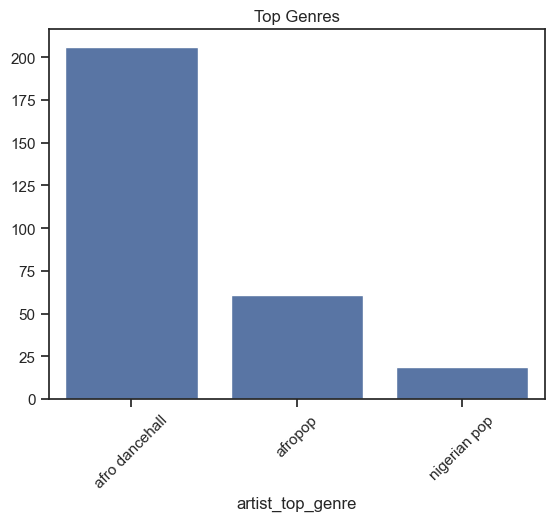

In [91]:
dominant = df[((df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop'))& (df['popularity'] > 0)]
top = dominant['artist_top_genre'].value_counts()
plt.figure()
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top Genres')

<Axes: >

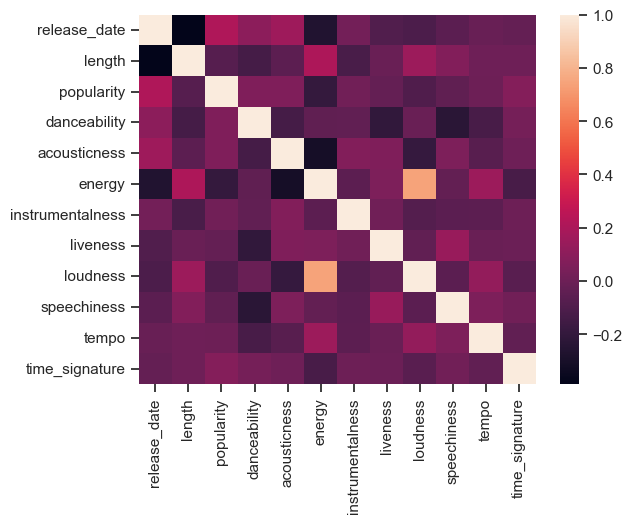

In [92]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix)

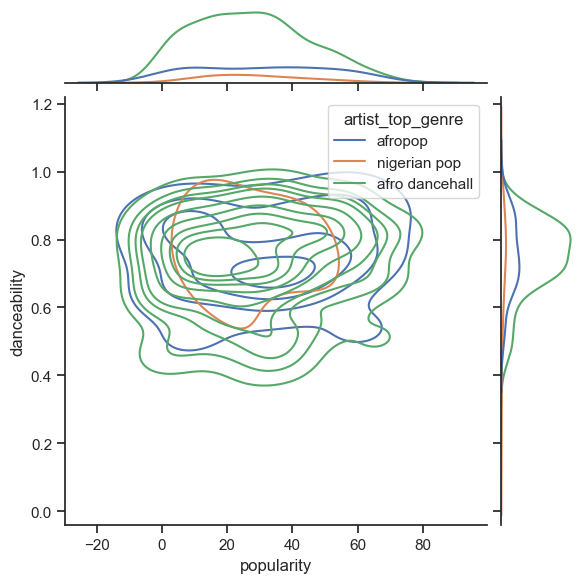

In [93]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=dominant,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

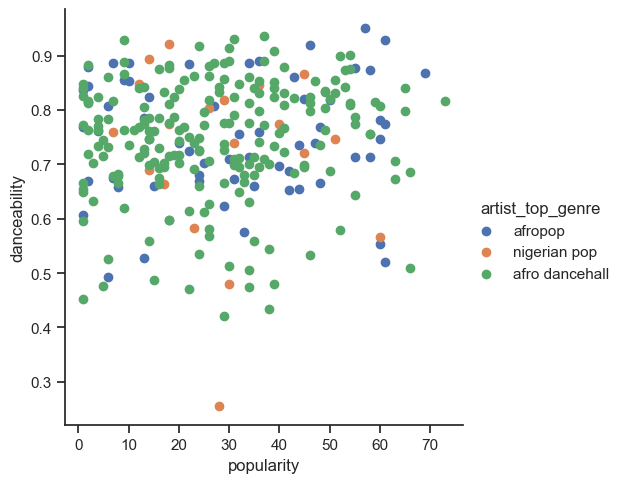

In [94]:
sns.FacetGrid(dominant, hue="artist_top_genre",height=5) \
   .map(plt.scatter, "popularity", "danceability") \
   .add_legend()

loudness is not numeric
speechiness is not numeric
tempo is not numeric
time_signature is not numeric


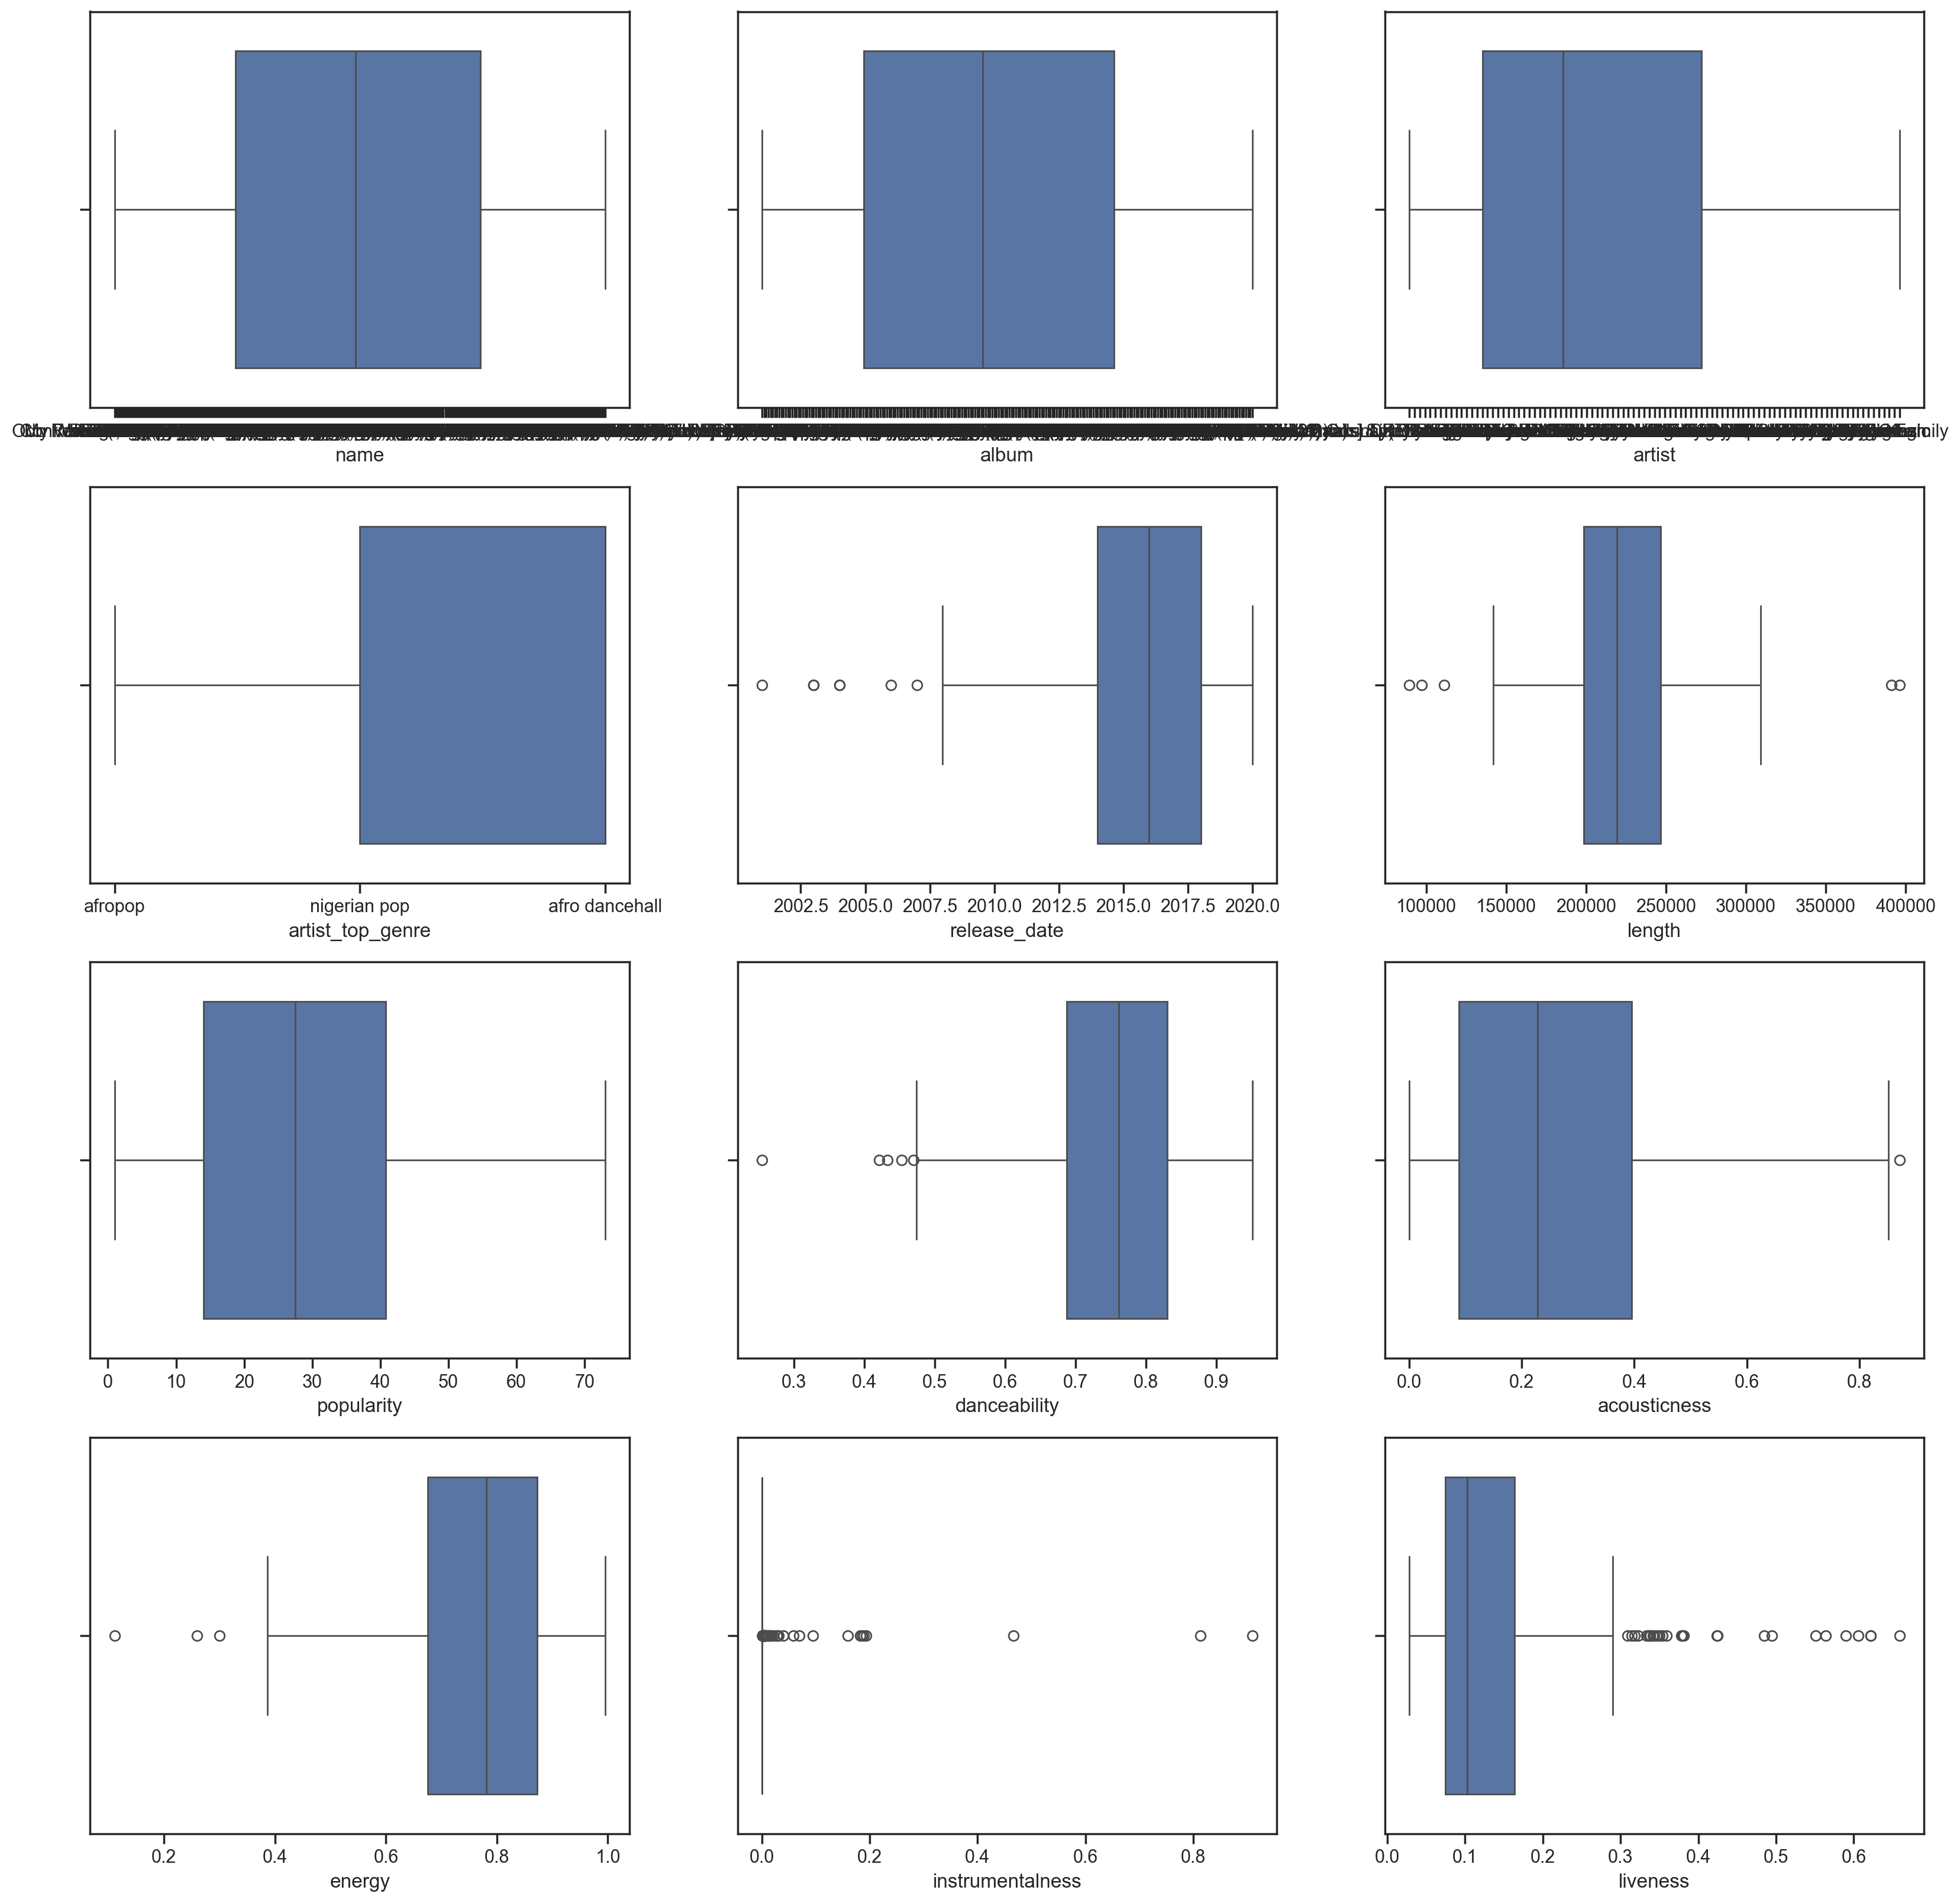

In [95]:
plt.figure(figsize=(20,20), dpi=200)
i =0
for column in dominant.columns: #not using enumerate so i can do replacement if theres an except
    try:
        plt.subplot(4, 3, i+1)
        sns.boxplot(x=column, data=dominant)
        i+=1
    except:
        print(f"{column} is not numeric")
plt.show()

In [96]:
label_encoder = LabelEncoder()
dominant['artist_top_genre_encoded'] = label_encoder.fit_transform(dominant['artist_top_genre'])
X,y = dominant[['popularity','danceability','acousticness','loudness','energy']],dominant['artist_top_genre_encoded']
dominant.head()


C:\Users\elwal\AppData\Local\Temp\ipykernel_20580\4199237910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dominant['artist_top_genre_encoded'] = label_encoder.fit_transform(dominant['artist_top_genre'])


,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,artist_top_genre_encoded
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3,1
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4,2
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4,1
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4,2
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4,2


In [97]:
X

,popularity,danceability,acousticness,loudness,energy
1,30,0.710,0.0822,-5.640,0.683
3,14,0.894,0.7980,-4.961,0.611
4,25,0.702,0.1160,-6.044,0.833
5,26,0.803,0.1270,-10.034,0.525
6,29,0.818,0.4520,-9.840,0.587
...,...,...,...,...,...
514,20,0.838,0.0358,-3.723,0.931
515,14,0.786,0.1950,-4.232,0.806
519,2,0.879,0.2240,-4.602,0.916
522,26,0.863,0.0366,-3.130,0.896


In [98]:
y

1      1
3      2
4      1
5      2
6      2
      ..
514    0
515    0
519    1
522    0
525    0
Name: artist_top_genre_encoded, Length: 286, dtype: int32

In [99]:
km = KMeans(n_clusters=3)
km.fit(X)
predict = km.predict(X)
predict

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1,
       0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1,
       2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0,
       2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0,
       0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0,
       2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2])

In [100]:
score = metrics.silhouette_score(X, predict) 
score # if close to negative one then its dense if close to 1 then its overlapping clusters we want it close to 1

0.5494667525264473

elbow method

In [101]:
wcss = [] # measures the squared average distance of all the points within a cluster to the cluster centroid.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++') #initilize centroids to be far away from eachother
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

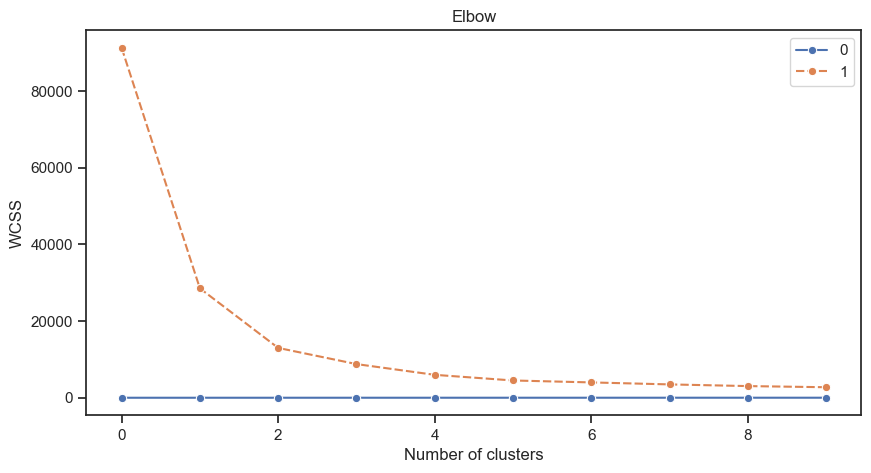

In [102]:
plt.figure(figsize=(10,5))
sns.lineplot(data = (range(1, 11), wcss),marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

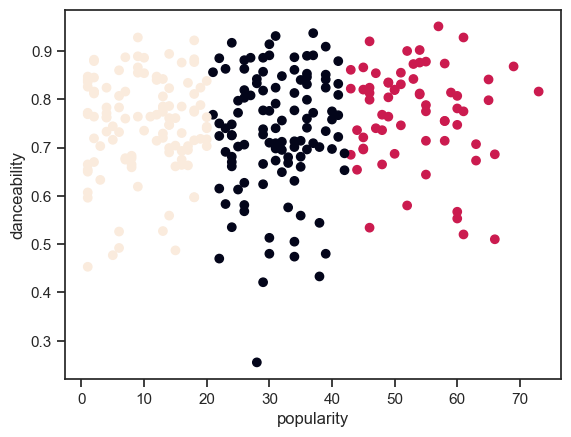

In [103]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(dominant['popularity'],dominant['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [104]:
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 112 out of 286 samples were correctly labeled.
Accuracy score: 0.39


The above result was logical based on the fact that the elbow point seemed to infer that there are 5 categories, and the silhouette score was not close to one. Also according to sklearns documentation the shape of our kmeans scatter plot shows an "unequal variance" situation.